In [2]:
# virtual env used for this file is hopper_py376 b/c of venn library
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from venn import venn

from data_loader import get_patho_likelypatho_neutral_dbnsfp_dataset
from plots_helper import *

Index(['clinvar_id', 'gene_symbol', 'gene_id', 'snp_id', 'chrom_acc_version',
       'chrom_pos', 'ref_allele', 'alt_allele', 'prot_acc_version', 'prot_pos',
       'wt', 'mut', 'class', 'chrom', 'SIFT_score', 'Polyphen2_HVAR_score',
       'MetaRNN_score', 'REVEL_score', 'MVP_score', 'CADD_raw_score',
       'integrated_fitCons_score', 'phyloP17way_primate_score',
       'phastCons17way_primate_score', 'bStatistic_score', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq'],
      dtype='object')
(9472, 28)
Likely-pathogenic    4162
Pathogenic           2305
Rare                 1983
Common               1022
Name: class, dtype: int64
#-unique prots:  1430


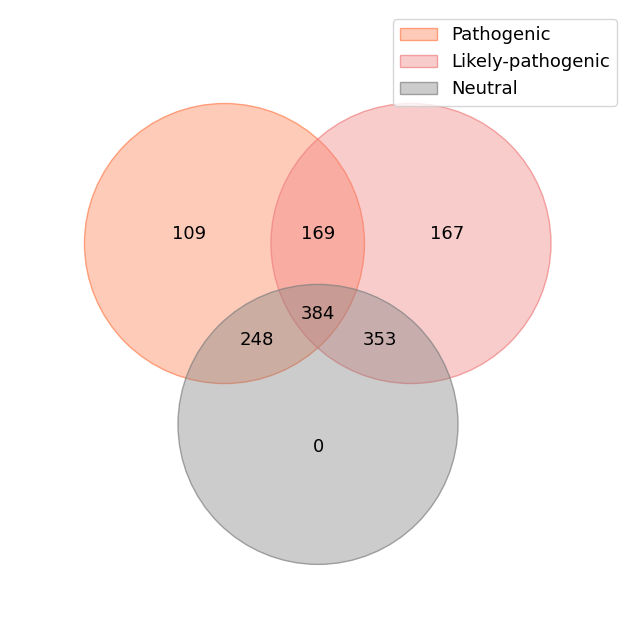

In [3]:
patho_df, _ = get_patho_likelypatho_neutral_dbnsfp_dataset(home_dir)

x = patho_df.copy()
x.loc[(x["class"]!="Pathogenic") & (x["class"]!="Likely-pathogenic"), "class"] = "Neutral"
a = set(x[(x["class"]=="Pathogenic")]["prot_acc_version"].unique())
b = set(x[(x["class"]=="Likely-pathogenic")]["prot_acc_version"].unique())
c = set(x[(x["class"]=="Neutral")]["prot_acc_version"].unique())

data = {'Pathogenic':a, 'Likely-pathogenic':b, 'Neutral':c}
venn(data, cmap=patho_colors_list)

# plt.show()
plt.savefig(home_dir+f"models/aa_common/plots_venn_diagram/patho.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'chrom', 'SIFT_score',
       'Polyphen2_HVAR_score', 'MetaRNN_score', 'REVEL_score', 'MVP_score',
       'CADD_raw_score', 'integrated_fitCons_score',
       'phyloP17way_primate_score', 'phastCons17way_primate_score',
       'bStatistic_score', 'n_methods_having_preds'],
      dtype='object')
(26409, 26)
Common        6976
Ultra-rare    6957
Singleton     6955
Rare          5521
Name: class, dtype: int64
#-unique prots:  6976


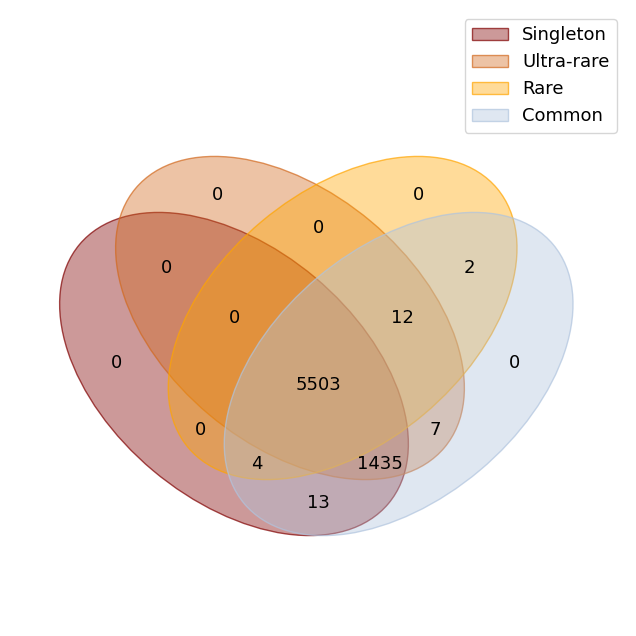

In [4]:
from data_loader import get_popu_freq_dbnsfp_dataset
popu_freq_df, _ = get_popu_freq_dbnsfp_dataset(home_dir)

x = popu_freq_df.copy()
a = set(x[(x["class"]=="Common")]["prot_acc_version"].unique())
b = set(x[(x["class"]=="Rare")]["prot_acc_version"].unique())
c = set(x[(x["class"]=="Ultra-rare")]["prot_acc_version"].unique())
d = set(x[(x["class"]=="Singleton")]["prot_acc_version"].unique())

data = {'Singleton':d, 'Ultra-rare':c, 'Rare':b, 'Common':a}
from venn import venn
venn(data, cmap=popu_freq_colors_list)

# plt.show()
plt.savefig(home_dir+f"models/aa_common/plots_venn_diagram/popu_freq.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)